### Download the plots from WandB as CSV files.

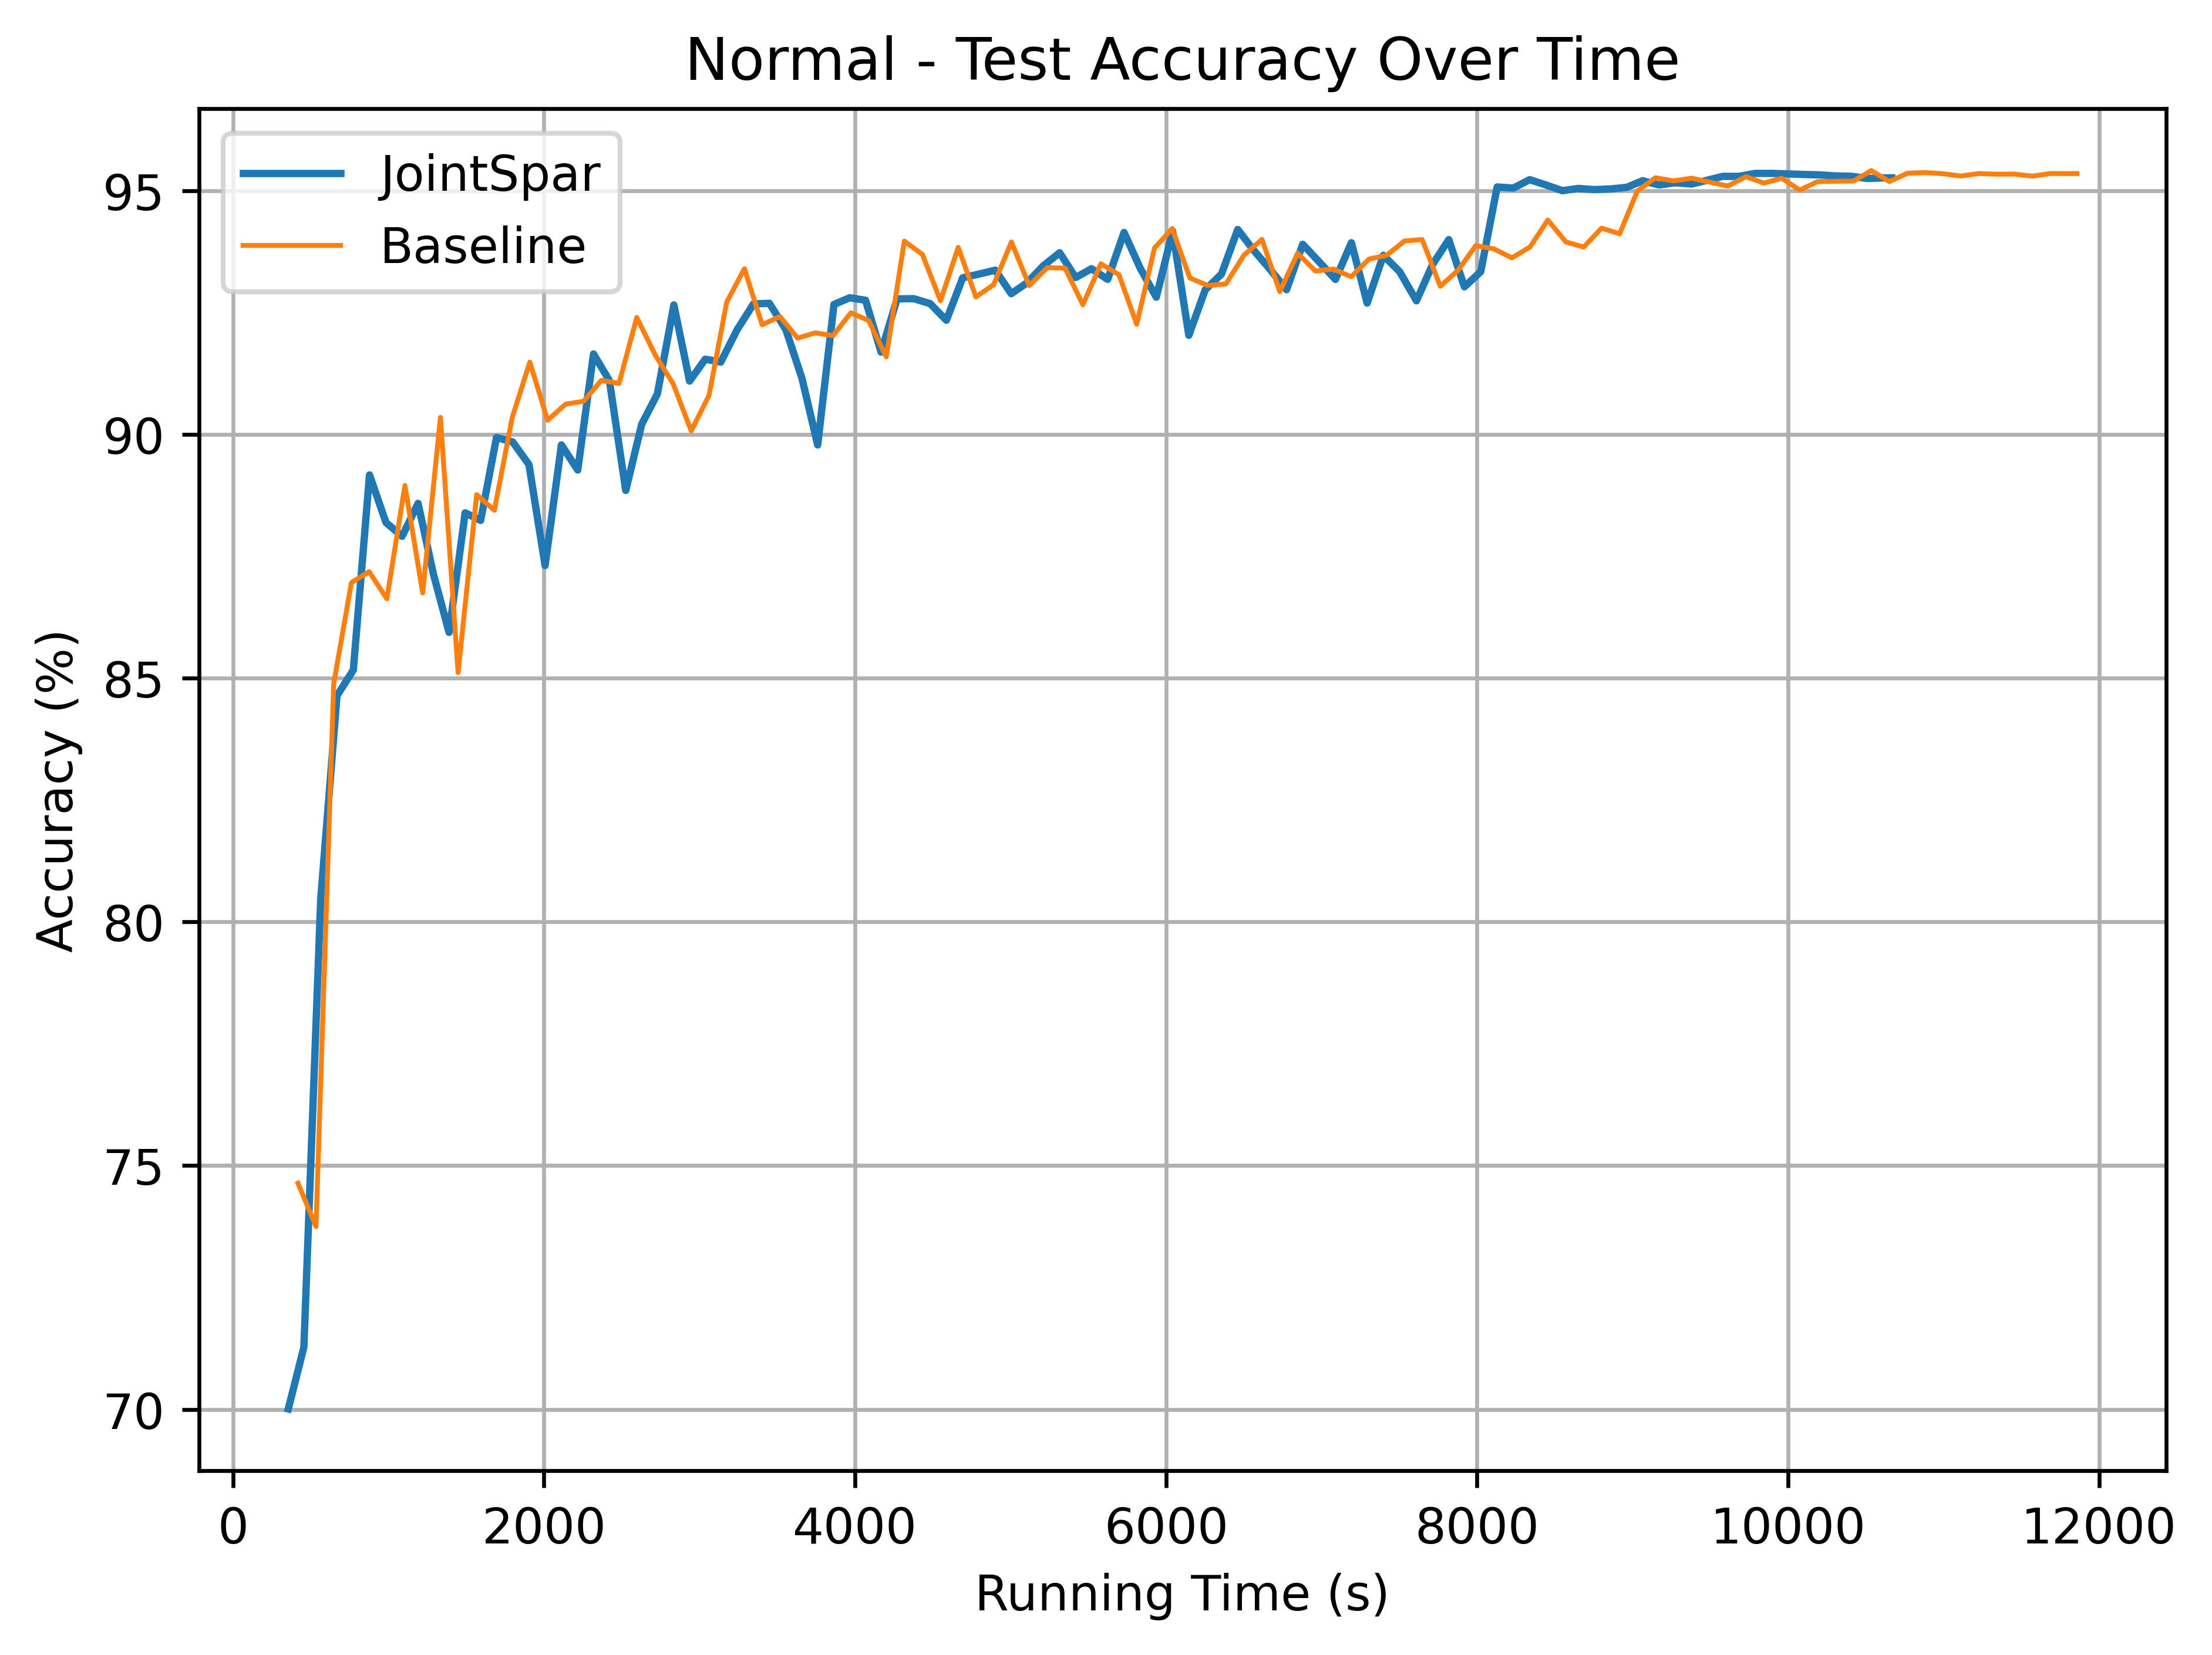

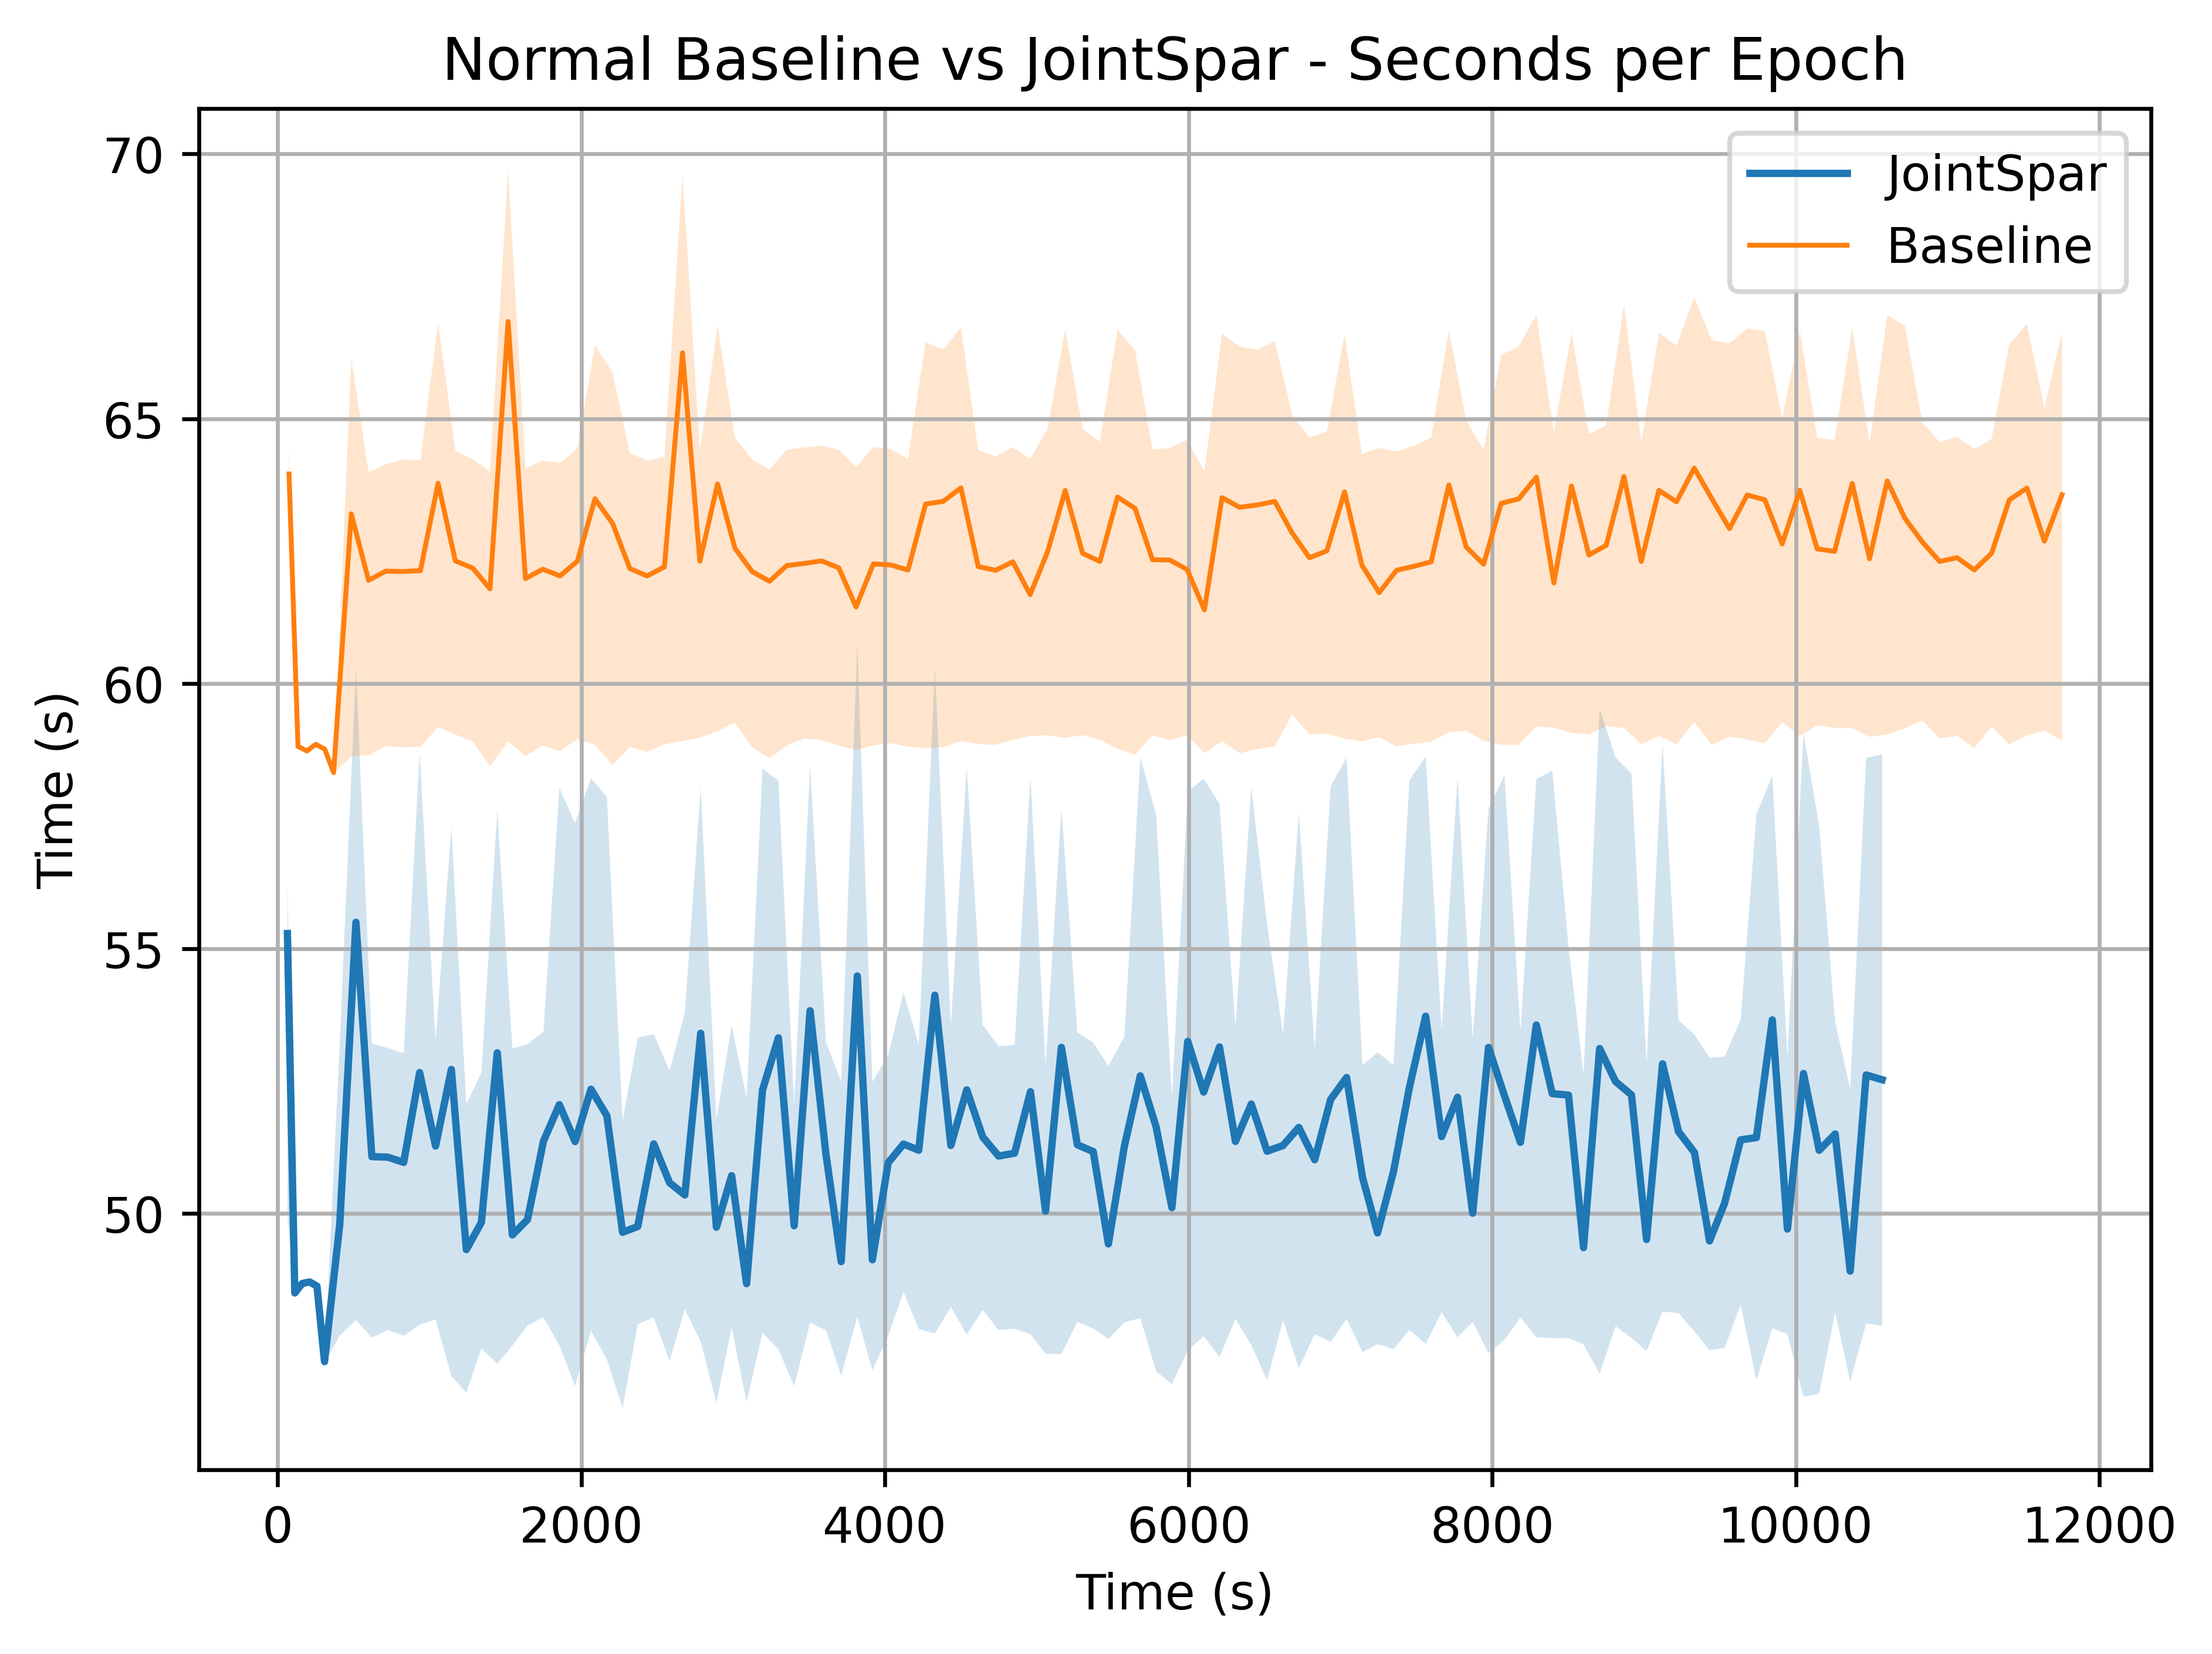

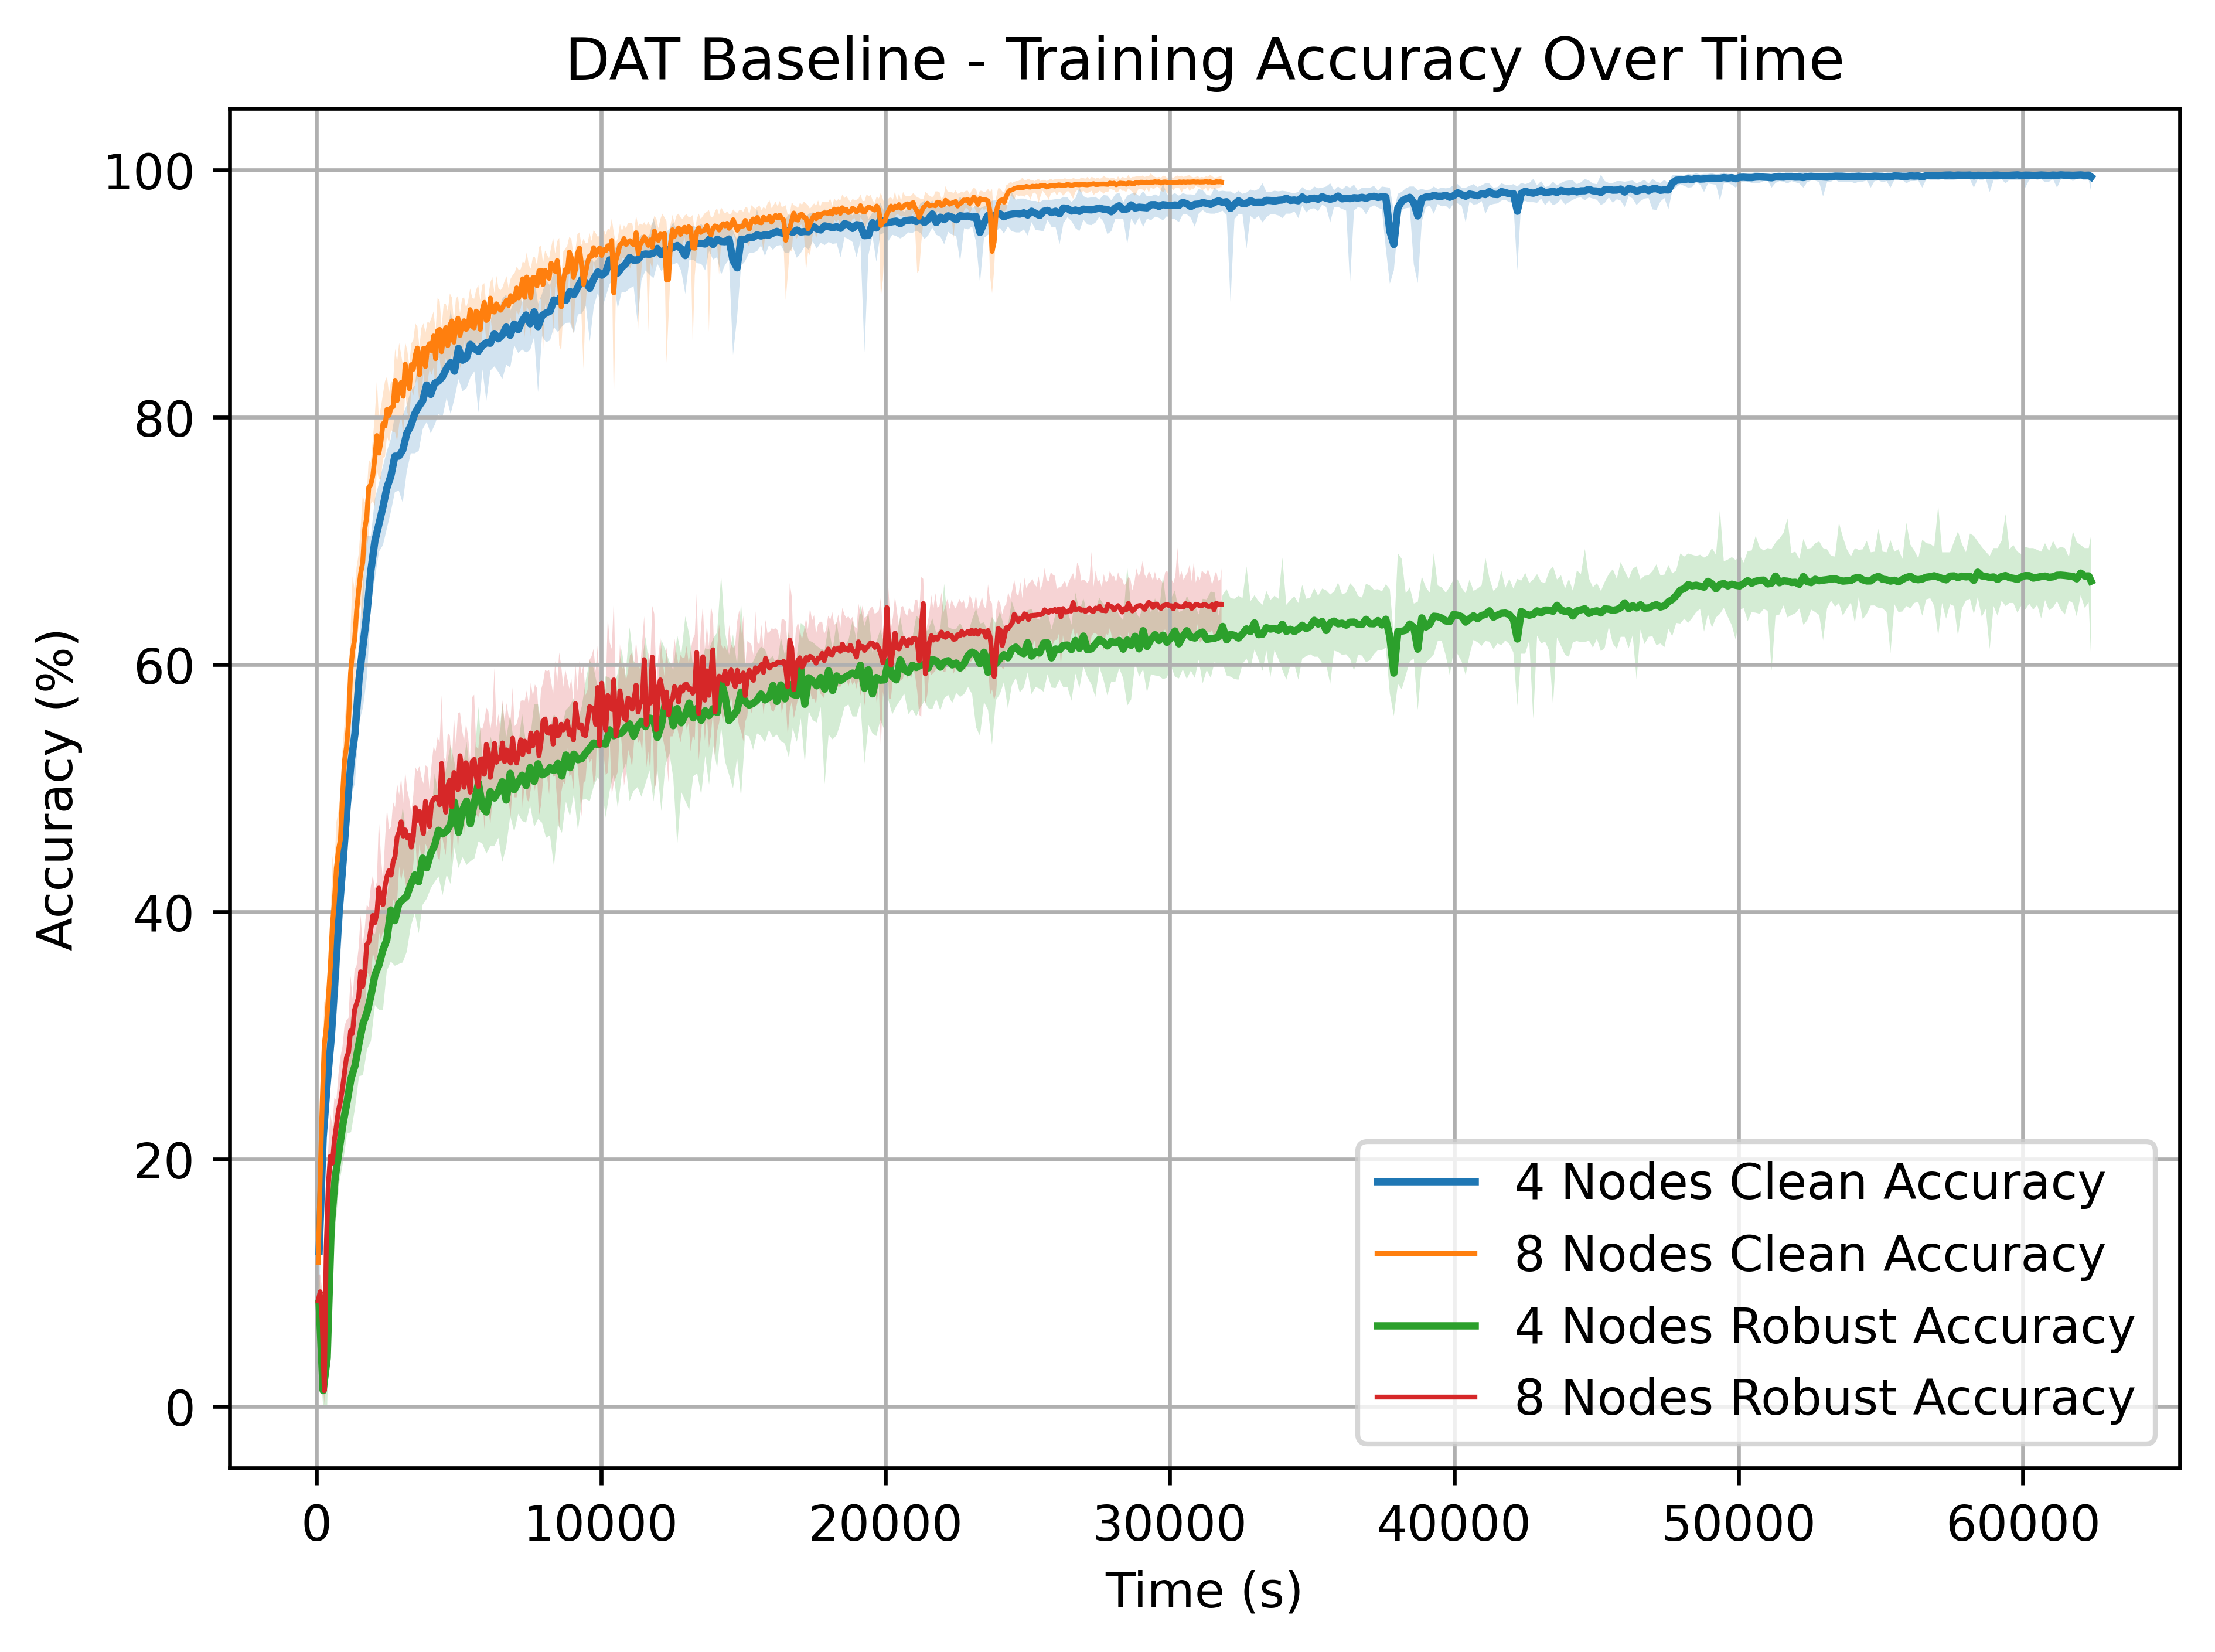

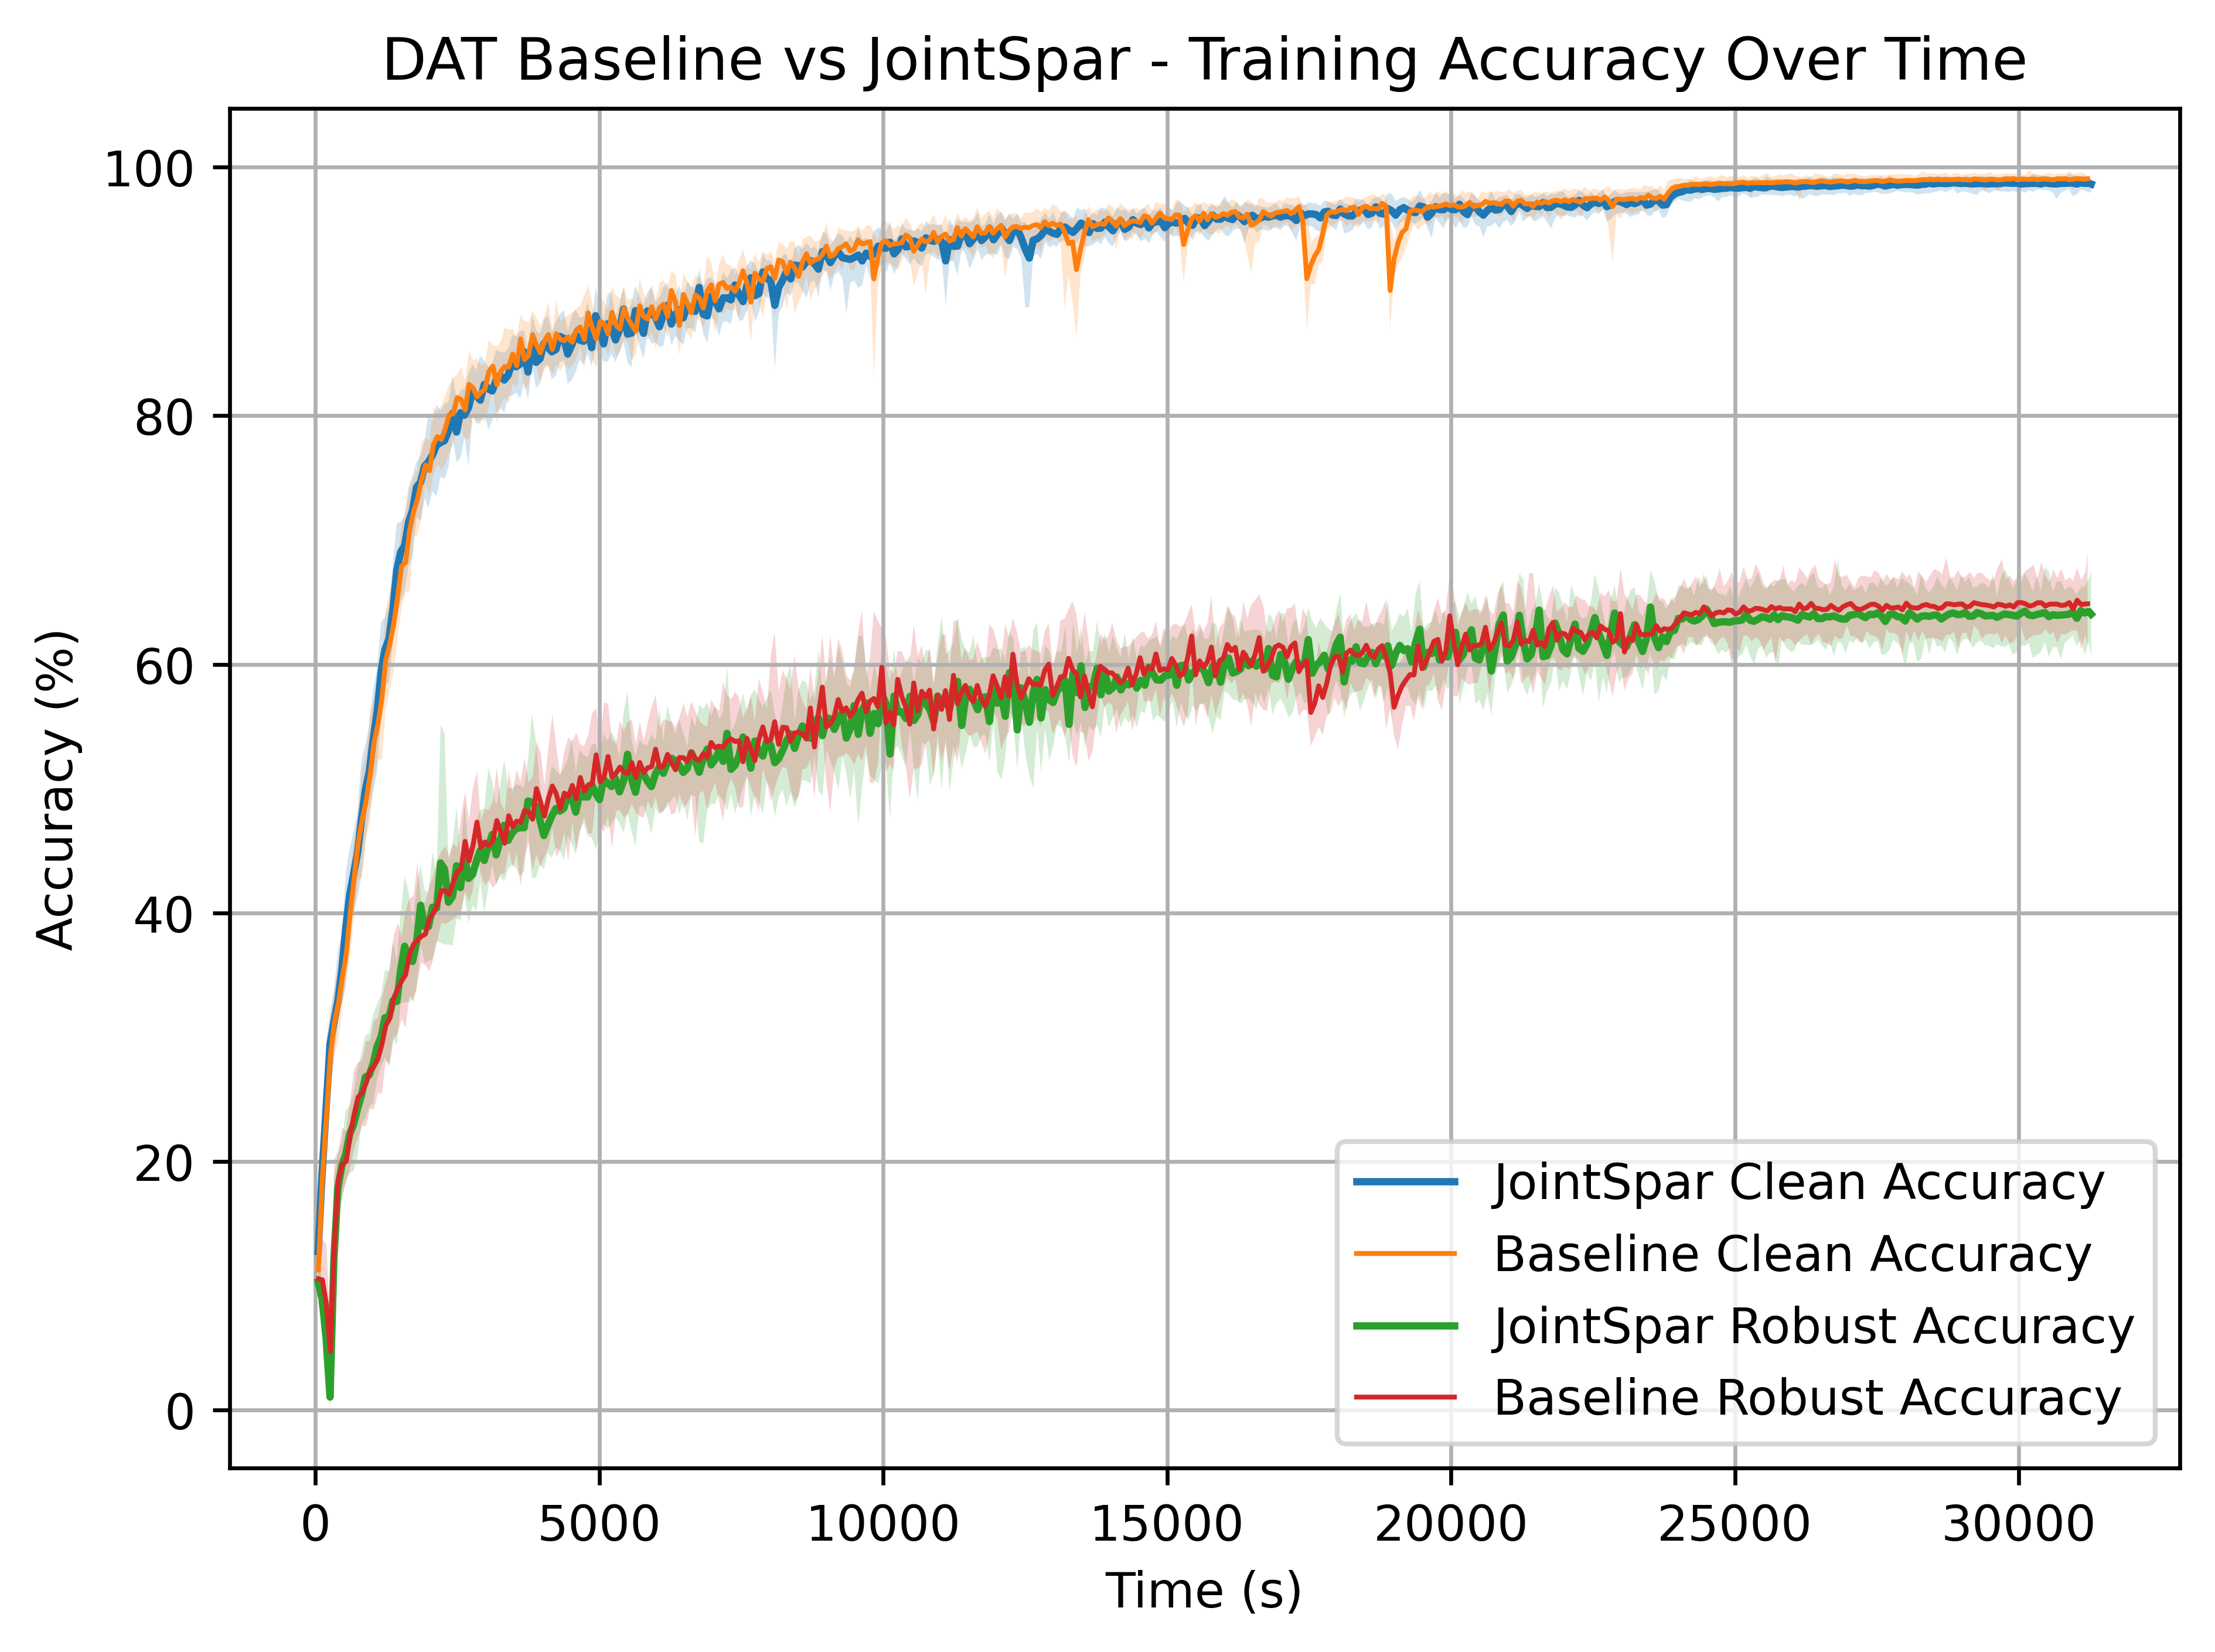

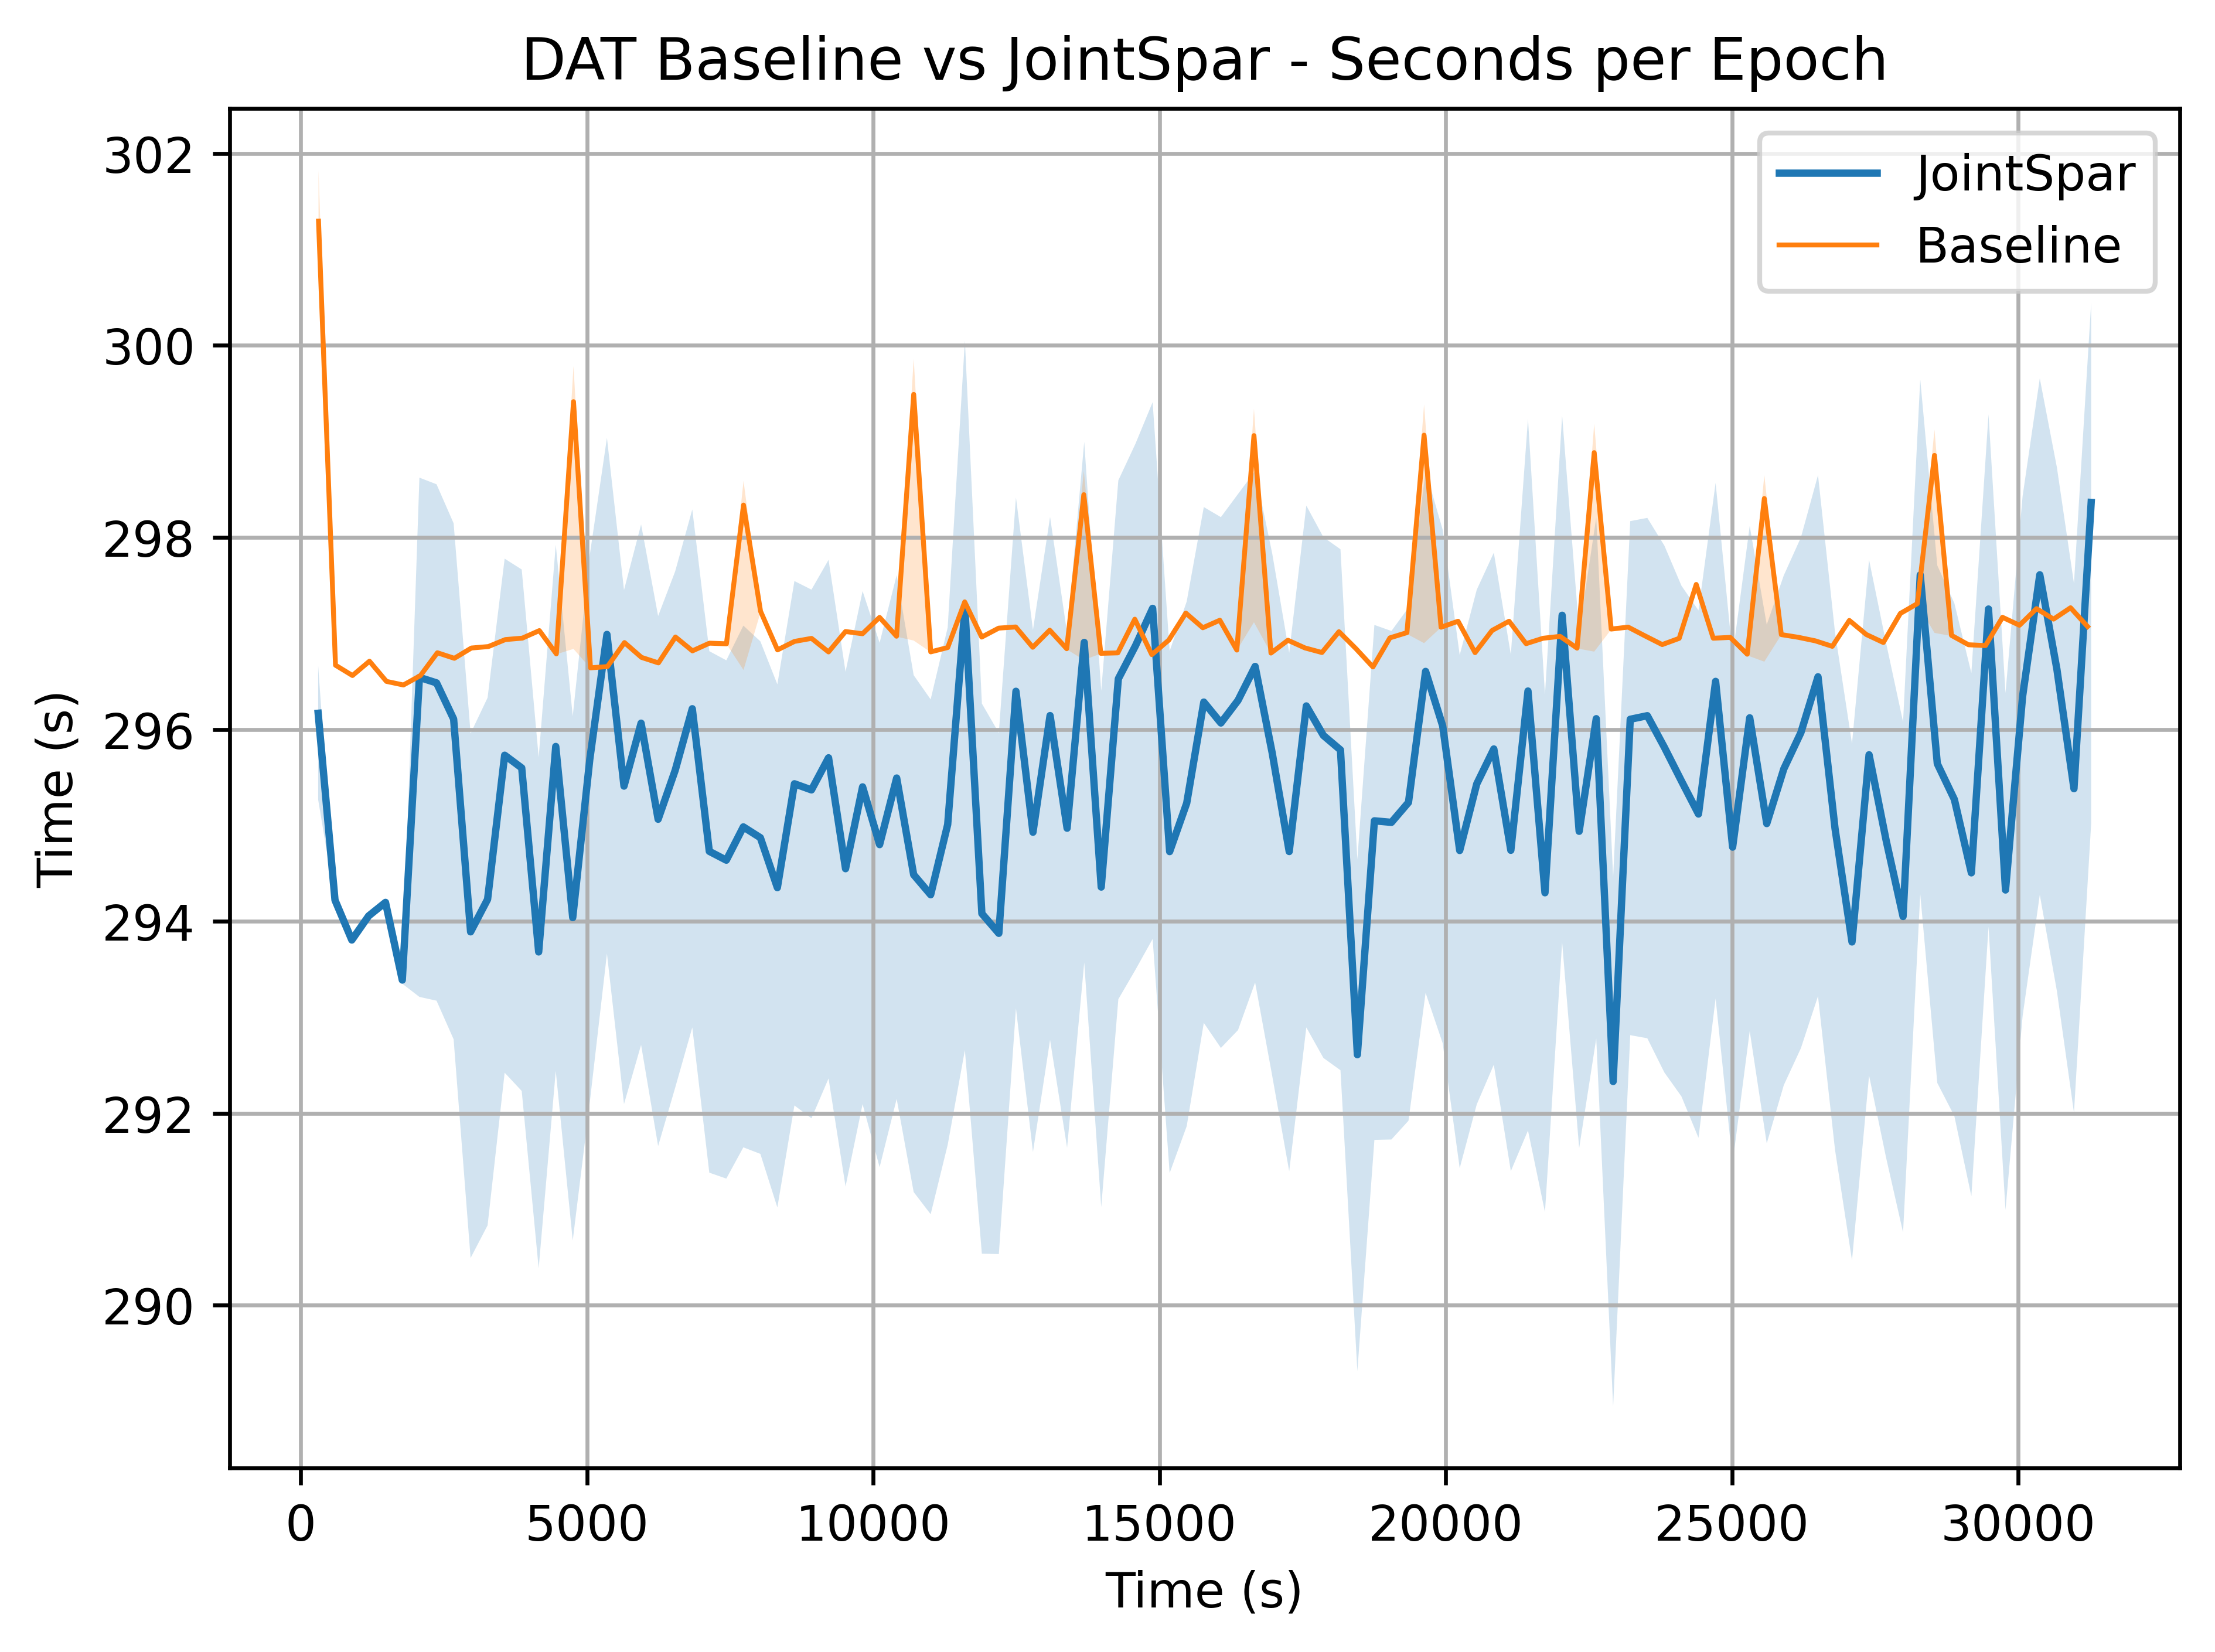

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 10000)

def plot_data(file, group_name='JOINTSPAR', group_label='', not_group_label='', n_run_parts=2, group_size=(8,8), index='Relative Time (Process)', xlabel='Running Time (s)', ylabel='', title='Plot', ax=None):
    df = pd.read_csv(file)
    df = df.set_index(index)
    #Remove step columns
    step_columns = [column for column in df.columns if 'step' in column]
    df = df.drop(step_columns, axis=1)
    
    #Separate group and not group columns
    group = [group_name in column for column in df.columns]
    not_group = [not in_group for in_group in group]
    df_group = df.loc[: , group]
    df_not_group = df.loc[: , not_group]

    def plot_group(df, ax, group_name, n_machines, n_run_parts, linewidth=1):
        min_columns = [column for column in df.columns if '__MIN' in column]
        max_columns = [column for column in df.columns if '__MAX' in column]
        mean_columns = [column for column in df.columns if not('__MIN' in column or '__MAX' in column)]

        def process_column(df_metric, n_run_parts):
            df_list = []
            for i in reversed(range(n_run_parts)):
                df_list.append(df_metric.iloc[:, i].dropna())
            return pd.concat(df_list, axis=0)

        df_min = process_column(df.loc[: , min_columns], n_run_parts)
        df_max = process_column(df.loc[: , max_columns], n_run_parts)
        df_mean = process_column(df.loc[: , mean_columns], n_run_parts)

        index_plot = [df_mean.index[i:i+n_machines].values.mean() for i in np.arange(0, len(df_mean), n_machines)]
        mean_plot = [df_mean.iloc[i:i+n_machines].mean() for i in np.arange(0, len(df_mean), n_machines)]
        min_plot = [df_min.iloc[i:i+n_machines].min() for i in np.arange(0, len(df_min), n_machines)]
        max_plot = [df_max.iloc[i:i+n_machines].max() for i in np.arange(0, len(df_max), n_machines)]

        ax.plot(index_plot, mean_plot, label=group_name, linewidth=linewidth)
        ax.fill_between(x=index_plot, y1=min_plot, y2=max_plot, alpha=0.2)
        
    #Merge Training and Warmup
    do_plt_show = ax is None
    if ax is None:
        fig, ax = plt.subplots()

    plot_group(df_group, ax, group_label + ('' if do_plt_show else f' {title}'), group_size[0], n_run_parts, 1.5)
    plot_group(df_not_group, ax, not_group_label + ('' if do_plt_show else f' {title}'), group_size[1], n_run_parts, 1)
    if do_plt_show:
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.grid()
        ax.legend()
        plt.tight_layout()
        plt.show()

plt.rcParams['figure.dpi'] = 600

plot_data('./data/wandb_export_comparison_baseline_jointspar_test_accuracy.csv', group_label='JointSpar', not_group_label='Baseline', n_run_parts=1, group_size=(8,8), ylabel='Accuracy (%)', title='Normal - Test Accuracy Over Time')

plot_data('./data/wandb_export_normal_time_per_epoch.csv', group_label='JointSpar', not_group_label='Baseline', ylabel='Time (s)', xlabel='Time (s)', title='Normal Baseline vs JointSpar - Seconds per Epoch')


fig, ax = plt.subplots()
plot_data('./data/wandb_export_baseline_clean_training_accuracy.csv', group_name='_4_', group_label='4 Nodes', not_group_label='8 Nodes', group_size=(64,64), title='Clean Accuracy', ax=ax)
plot_data('./data/wandb_export_baseline_robust_training_accuracy.csv', group_name='_4_', group_label='4 Nodes', not_group_label='8 Nodes',  group_size=(64,64), title='Robust Accuracy', ax=ax)
ax.set_title("DAT Baseline - Training Accuracy Over Time")
ax.set_xlabel('Time (s)')
ax.set_ylabel('Accuracy (%)')
ax.grid()
ax.legend()
plt.tight_layout()
plt.show()

fig, ax = plt.subplots()
plot_data('./data/wandb_export_clean_training_accuracy.csv', group_label='JointSpar', not_group_label='Baseline', group_size=(64,64), ylabel='Accuracy (%)', title='Clean Accuracy', ax=ax)
plot_data('./data/wandb_export_robust_training_accuracy.csv', group_label='JointSpar', not_group_label='Baseline', group_size=(64,64), ylabel='Accuracy (%)', title='Robust Accuracy', ax=ax)
ax.set_title("DAT Baseline vs JointSpar - Training Accuracy Over Time")
ax.set_xlabel('Time (s)')
ax.set_ylabel('Accuracy (%)')
ax.grid()
ax.legend()
plt.tight_layout()
plt.show()

plot_data('./data/wandb_export_time_per_epoch.csv', group_label='JointSpar', not_group_label='Baseline', ylabel='Time (s)', xlabel='Time (s)', title='DAT Baseline vs JointSpar - Seconds per Epoch')